# MATH210 Project 2: The History of University Tuition Fee in Canada

There has been heat/talk about student debt and the ever increasing tuition fee. Akin to age, tuition fee for university only increases. The aim of this project is to understand the history of university tuition fee in Canada and see the changes in tuition fee since 1972. In particular, we will only be exploring average domestic undergraduates tuition fee in Canada. 

 * For the first part of the project, we will analyze the data down, find any anomalies and explain them in order to understand the history of undergraduate tuition fee in Canada.

 * As for the second part, we will attempt to find out how much more/less are we paying for tuition compared to about three decades ago. 
 
Before we start, there are some things that we must take note of regarding this data.

1. From 1972-73 to 2006-07, Undergraduate faculties include Agriculture, Architecture, Arts, Commerce, Dentistry, Education, Engineering, Household Science, Law, Medicine, Music, and Science.

2. There are two different instances for the year 2006-2007 that resulted from modifications to the questionnaire (implementation of the Classification of Instructional Programs (CIP) for both undergraduate and graduate programs) and the expansion of the survey universe.

3. Starting with the revised 2006-2007 data the programs include Agriculture, Natural Resources and Conservation, Architecture and related Technologies, Humanities, Business Management and Public Administration, Education, Engineering, Law, Medicine, Visual and Performing Arts & Comm. Technologies, Physical and Life Sciences and Technologies, Math., Computer and information Sciences, Social and Behavioural Sciences, Parks, Recreation, Health (other than medicine) and Fitness.

4. Starting with the revised 2007-2008 data,  the undergraduate programs include Agriculture, Natural Resources and Conservation, Architecture and related Technologies, Humanities, Business Management and Public Administration, Education, Engineering, Law, Visual and Performing Arts & Comm. Technologies, Physical and Life Sciences and Technologies, Math., Computer and information Sciences, Social and Behavioural Sciences, Dentistry, Medicine, Nursing, Pharmacy, Veterinary medicine, OtherHealth, Parks, Recreation and Fitness

5. I have tweaked the original CSV file to include 2015-2016 university tuition fee which was not present at the time of retrieval. I have also included [Consumer Price Index and Change of Consumer Price Index (YoY)](http://www.statcan.gc.ca/tables-tableaux/sum-som/l01/cst01/econ46a-eng.htm) data acquired from Statistics Canada for further analysis.

6. Data for 2015-2016 may include estimates that were provided by responding institutions, in cases where final fees were not available before the reporting due date. Note that these preliminary data are from [Statistics Canada](http://www.statcan.gc.ca/start-debut-eng.html).

## Table of Contents:
1. Looking at the data.
2. Anomalies? What happened?
 * BC
 * Nova Scotia
 * Newfoundland and Labrador
 * Quebec
3. How much more/less are we paying?
4. Conclusion
5. Fun fact!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('UniversityTuitionFee.csv')

# 1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 14 columns):
Period                       45 non-null object
Canada                       45 non-null float64
Newfoundland and Labrador    45 non-null float64
Prince Edward Island         45 non-null float64
Nova Scotia                  45 non-null float64
New Brunswick                45 non-null float64
Quebec                       45 non-null float64
Ontario                      45 non-null float64
Manitoba                     45 non-null float64
Saskatchewan                 45 non-null float64
Alberta                      45 non-null float64
British Columbia             45 non-null float64
Average CPI                  45 non-null float64
%CHG CPI                     45 non-null float64
dtypes: float64(13), object(1)
memory usage: 5.0+ KB


In [4]:
df.head(3)

,Period,Canada,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia,Average CPI,%CHG CPI
0,1972-1973,534.0,500.0,550.0,663.0,601.0,508.0,592.0,434.0,427.0,415.0,465.0,21.9,4.8
1,1973-1974,534.0,500.0,550.0,664.0,581.0,519.0,595.0,434.0,479.0,415.0,442.0,23.6,7.8
2,1974-1975,547.0,500.0,600.0,667.0,590.0,544.0,605.0,435.0,480.0,415.0,441.0,26.2,11.0


In [5]:
df.tail(2)

,Period,Canada,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia,Average CPI,%CHG CPI
43,2014-2015,5998.0,2660.0,5849.0,6483.0,6298.0,2740.0,7562.0,3857.0,6693.0,5738.0,5201.0,125.2,2.0
44,2015-2016,6191.0,2660.0,6119.0,6817.0,6353.0,2799.0,7868.0,3930.0,6885.0,5738.0,5305.0,126.6,1.1


### Getting the years as integer

We will be using this for analysis later on.

In [6]:
df['Year']=df['Period'].map(lambda x: int(x[0:4]))

We will also be defining the 'Year' as index function as ind_Year for computations

In [7]:
ind_Year = df.set_index('Year')

Let's set the 'Period' column to be the index column

In [8]:
df.set_index('Period',inplace=True)

### Tuition fee by ascending order for the 2015/2016 academic year

In [9]:
print(df[[1,2,3,4,5,6,7,8,9,10]].ix[44:45].T.sort_values(by='2015-2016'))

Period                     2015-2016
Newfoundland and Labrador     2660.0
Quebec                        2799.0
Manitoba                      3930.0
British Columbia              5305.0
Alberta                       5738.0
Prince Edward Island          6119.0
New Brunswick                 6353.0
Nova Scotia                   6817.0
Saskatchewan                  6885.0
Ontario                       7868.0


In [10]:
print(df[[1,2,3,4,5,6,7,8,9,10]].ix[44:45].T.sort_values(by='2015-2016').rank())

Period                     2015-2016
Newfoundland and Labrador        1.0
Quebec                           2.0
Manitoba                         3.0
British Columbia                 4.0
Alberta                          5.0
Prince Edward Island             6.0
New Brunswick                    7.0
Nova Scotia                      8.0
Saskatchewan                     9.0
Ontario                         10.0


### Visualizing tuition fee for each province during the period 1972-2016

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


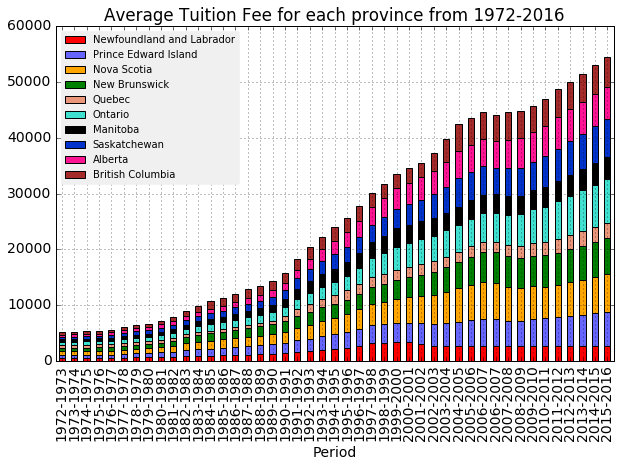

In [11]:
df[[1,2,3,4,5,6,7,8,9,10]].plot.bar(stacked=True,figsize=(10,6),color=['r','#6666ff','orange','g','darksalmon',
                    'turquoise','k','#0033cc','deeppink','brown'],
                     title='Average Tuition Fee for each province from 1972-2016')
plt.style.use('fivethirtyeight')
plt.legend(loc=2,prop={'size':10})
plt.grid(True)
plt.show()

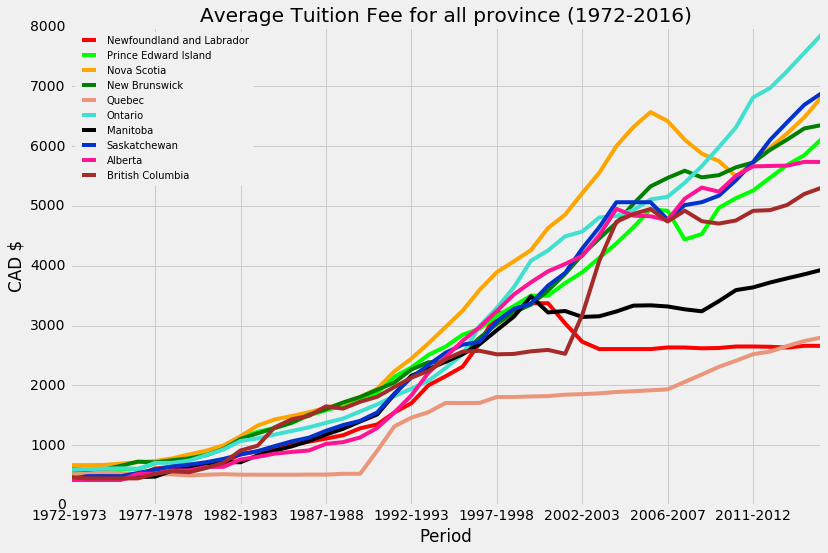

In [12]:
df[[1,2,3,4,5,6,7,8,9,10]].plot(figsize=(12,8),color=['r','#00ff00','orange','g','darksalmon',
                'turquoise','k','#0033cc','deeppink','brown'],title='Average Tuition Fee for all province (1972-2016)');

plt.style.use('seaborn-pastel')
plt.legend(loc=2,prop={'size':10})
plt.grid(True)
plt.ylabel('CAD $')
plt.show()

Just from this simple graph above, one may start to ask questions and I will tackle some of these questions based on research that I've done.

* The sharp increase in tuition for universities in British Columbia from about 2002 to 2004!
* The decrease in tuition for universities in Nova Scotia from 2005/6 to 2010
* The constant tuition fee for universities in Quebec from 1972-1990 and from 1997-2007
* The decrease and constant tuition for universities in Newfoundland and Labrador at around 2001

## What's with the sharp increase in tuition fees in BC from 2002-2004?

To illustrate it with more clarity, let's plot a horizontal bar graph.

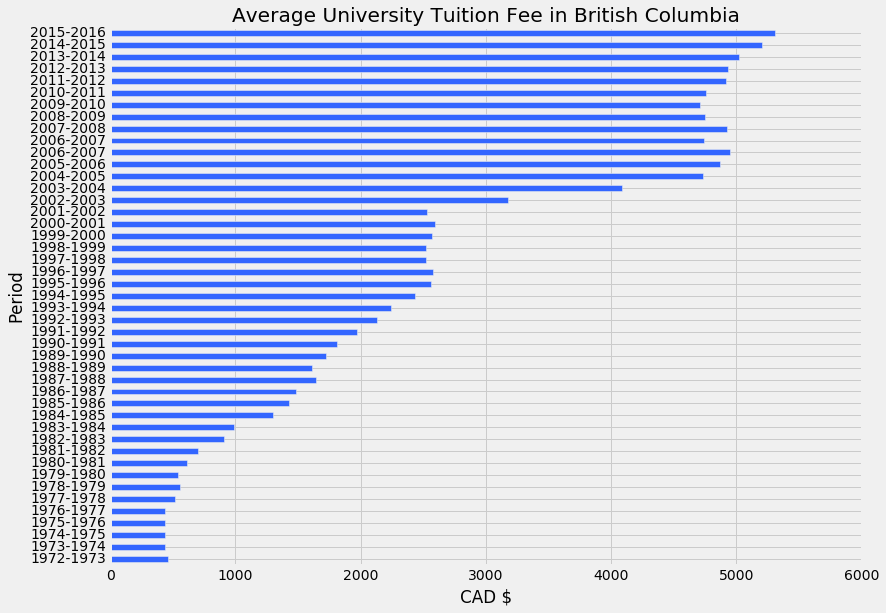

In [13]:
df['British Columbia'].plot.barh(figsize=(12,9),color='#3366ff',
                                 title ='Average University Tuition Fee in British Columbia')

plt.style.use('seaborn-notebook')
plt.xlabel('CAD $')
plt.show()

We can identify a trend from 1995-2001 where tuition for universities in BC were uniform  and a large spike from 2002 to 2004! Why? 

After some [digging](http://www.statcan.gc.ca/daily-quotidien/020821/dq020821b-eng.htm), BC capped the tuition from 1995 to 2001 and then lifted the cap from 2002 onwards. But how big was the spike for that 2 years after?! Let's calculate it.

In [14]:
df['British Columbia'].ix[29:33]

Period
2001-2002    2527.0
2002-2003    3176.0
2003-2004    4084.0
2004-2005    4735.0
Name: British Columbia, dtype: float64

In [15]:
df['British Columbia'].ix[29:33].diff().sum()/2527*100

87.376335575781567

OMG! Tuition increased by 87.4% just over a 2-year period

## Decrease in tuition fee!? What happened in Nova Scotia?

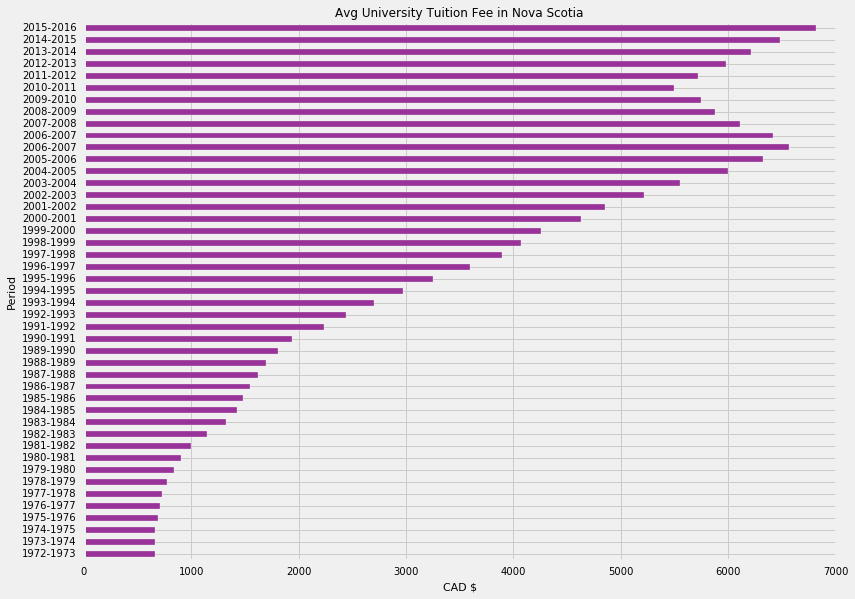

In [16]:
df['Nova Scotia'].plot.barh(figsize=(12,9),color='#993399',title ='Avg University Tuition Fee in Nova Scotia')

plt.style.use('seaborn-notebook')
plt.xlabel('CAD $')
plt.show()

It is easy to notice that tuition has seem to be increasing exponentially from the mid 1970s up until 2007. In fact, if you go back up to the very first graph we plot, Nova Scotia has the highest tuition cost for almost two decades from the early 1990s to late 2000s!

Let's attempt to calculate exactly how much did average tuition fees for universities in Nova Scotia increased over the period from 1990 to 2007 compared to the average tuition fees for universities across Canada

In [17]:
#Calculates the % change in average tuition fee in Nova Scotia from 1990-2007
NS_avg9007 = df['Nova Scotia'].ix[18:35].diff().sum()/ind_Year['Nova Scotia'].loc[1990]*100
NS_avg9007

238.53683668212261

In [18]:
#Calculates the % change in average tuition fee in Canada from 1990-2007
CA_avg9007 = df['Canada'].ix[18:35].diff().sum()/ind_Year['Canada'].loc[1990]*100
CA_avg9007

196.92622950819671

From the calculations above, the increase in average tuition fees in Nova Scotia from 1990 - 2007 is a staggering 238.5% increase!! Whereas, the average tuition fees for universities across Canada increased by an alarming rate of 197%.

### The decrease in tuition fee in Nova Scotia from 2008-2011

From the year 2008-2011, it is [reported](http://www.cbc.ca/news/canada/nova-scotia/nova-scotia-freezes-university-tuition-1.726114) that universities in Nova Scotia will be capping tuition fees and reducing it over that period and we calculated that tuition fees decreased by 14.4% shown below

In [19]:
df['Nova Scotia'].ix[35:40].diff().sum()/6422*100

-14.403612581750233

## Newfoundland and Labrador

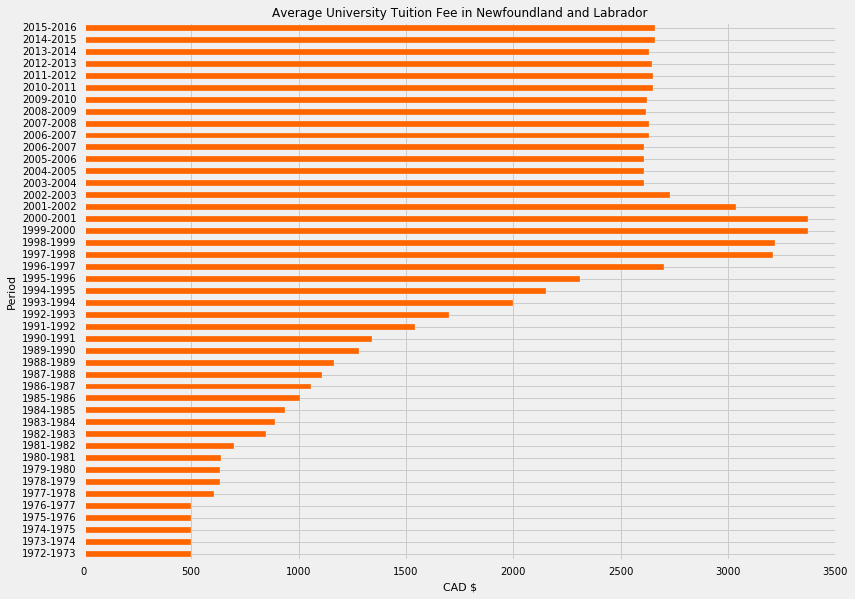

In [20]:
df['Newfoundland and Labrador'].plot.barh(figsize=(12,9),color='#ff6600',
                                         title ='Average University Tuition Fee in Newfoundland and Labrador')
plt.style.use('seaborn-pastel')
plt.xlabel('CAD $')
plt.show()
#df['Newfoundland and Labrador'].ix[20:]

Notice that at around 2000 - 2004/5 for the province of Newfoundland and Labrador, fees dramatically decreased! Why?

But before that, we will calculate exactly how much was the decrease over the 4year period

In [21]:
#df['Newfoundland and Labrador'].ix[28:32].diff().sum()/3373*100
ind_Year['Newfoundland and Labrador'].loc[2000:2004].diff().sum()/ind_Year['Newfoundland and Labrador'].loc[2000]*100

-22.739401126593535

Tuition fee decreased by -22.7% and this is cosistent with what Statistics Canada [reported](http://www.statcan.gc.ca/daily-quotidien/040902/dq040902a-eng.htm).

### So, what happened?

In order to keep post secondary education affordable, and in an effort to keep enrollment high, the government of Newfoundland began a program to freeze tuition fees in 1999-2001. And in an ever bigger move, from 2001 to 2004, tuition was lowered for each year for a total decrease of 22.7% and then frozen again until today.
[Source](https://en.wikipedia.org/wiki/Higher_education_in_Newfoundland_and_Labrador)

This fact is consistent with the bar plot above for Newfoundland and Labrador.

## Quebec

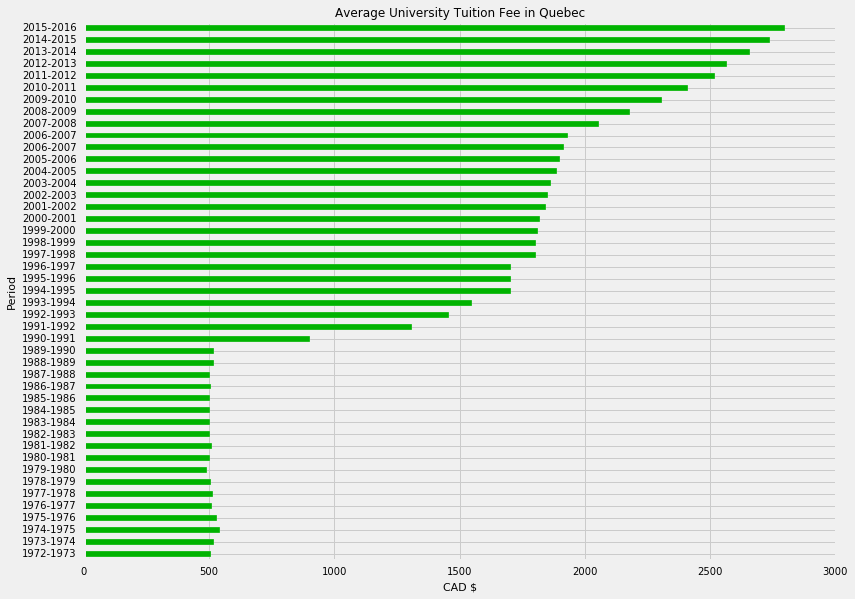

In [22]:
df['Quebec'].plot.barh(figsize=(12,9),color='#00b300',title ='Average University Tuition Fee in Quebec')

plt.style.use('seaborn-notebook')
plt.xlabel('CAD $')
plt.show()

Well, notice that from 1972 to 1990, fees didn't increase at all! This is consistent with the [fact](https://en.wikipedia.org/wiki/2012_Quebec_student_protests) that for 22 years (1968-1990), tuition fees in Quebec were frozen at \$540! The cap was then lifted for a short period of time before it was frozen another time from 1994 until 2007 (ranges from \$1,704 to \$1,932). From 2007 onwards, the freeze on tuition was lifted once again and hence we see a consistent increase in tuition from the year 2007 onwards

### Finding the total change in average tuition fee in % from 1972 to 2015

First, we must calculate the % change in tuition fee from year to year (YoY) across all provinces.

In [23]:
#Calculates the % change in tuition fee (YoY) across all provinces
df['%CHG Canada']=df['Canada'].pct_change()*100
df['%CHG Newfoundland and Labrador']=df['Newfoundland and Labrador'].pct_change()*100
df['%CHG Prince Edward Island']=df['Prince Edward Island'].pct_change()*100
df['%CHG Nova Scotia']=df['Nova Scotia'].pct_change()*100
df['%CHG New Brunswick']=df['New Brunswick'].pct_change()*100
df['%CHG Quebec']=df['Quebec'].pct_change()*100
df['%CHG Ontario']=df['Ontario'].pct_change()*100
df['%CHG Manitoba']=df['Manitoba'].pct_change()*100
df['%CHG Saskatchewan']=df['Saskatchewan'].pct_change()*100
df['%CHG Alberta']=df['Alberta'].pct_change()*100
df['%CHG British Columbia']=df['British Columbia'].pct_change()*100

We'll sum it up to get the total % change

In [24]:
df[[14,15,16,17,18,19,20,21,22,23,24]].sum()

%CHG Canada                       254.761218
%CHG Newfoundland and Labrador    180.778883
%CHG Prince Edward Island         251.918249
%CHG Nova Scotia                  243.913304
%CHG New Brunswick                245.626155
%CHG Quebec                       199.912868
%CHG Ontario                      270.376467
%CHG Manitoba                     233.386120
%CHG Saskatchewan                 291.241880
%CHG Alberta                      279.571751
%CHG British Columbia             265.711482
dtype: float64

### Let's see the deviation of the change in tuition (in %) for each province compared to Canada's

%CHG Newfoundland and Labrador   -73.982335
%CHG Quebec                      -54.848349
%CHG Manitoba                    -21.375098
%CHG Nova Scotia                 -10.847913
%CHG New Brunswick                -9.135062
%CHG Prince Edward Island         -2.842968
%CHG British Columbia             10.950264
%CHG Ontario                      15.615249
%CHG Alberta                      24.810534
%CHG Saskatchewan                 36.480663
dtype: float64


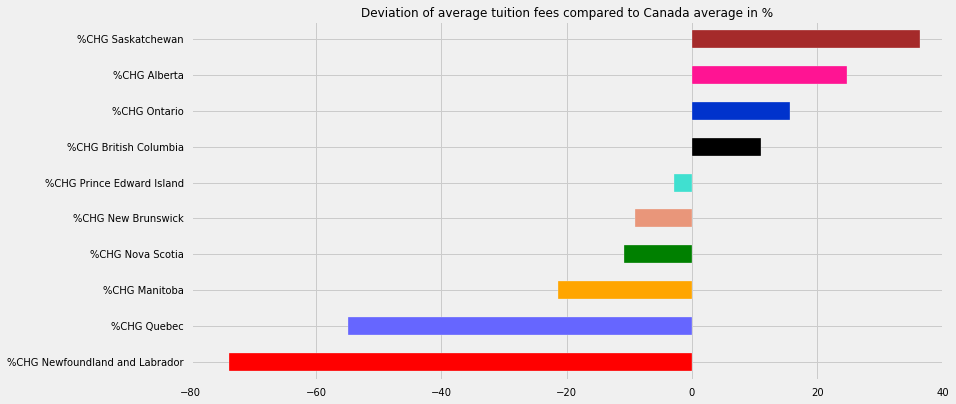

In [25]:
pct_changeCanada = df.set_index('Year')['%CHG Canada'].loc[1972:].sum()

k = df[[15,16,17,18,19,20,21,22,23,24]].sum()
for j in range(len(k)):
    for i in k:
        if i < pct_changeCanada:
            k[j] = k[j]- pct_changeCanada
            j=j+1
        else:
            k[j] = k[j] - pct_changeCanada
            j=j+1
    break;
k.sort_values(inplace=True)
print(k)
plt.style.use('seaborn-notebook')
k.plot.barh(figsize=(12,6),color=['r','#6666ff','orange','g','darksalmon', 'turquoise','k','#0033cc','deeppink','brown']
           ,title = 'Deviation of average tuition fees compared to Canada average in %');

We can conclude from the graph above that since 1972, Sasketchewan's increase in tuition fee is the highest(which is a little suprising) and next comes Alberta. On the other hand, Quebec and Newfoundland and Labrador has 54% and 73% less increase in fees compared to Canada which is no surprise considering the long period of tuition freezes and also tuition reduction they have over since 1972 - 2015

# 3. Consumer Price Index(CPI) vs Average Tuition Fee

So, what is Consumer Price Index (CPI)?
* CPI is simply an indicator of changes in consumer prices experienced by Canadians. It is obtained by comparing, over time, the cost of a fixed basket of goods and services purchased by consumers. Alternatively, CPI is widely used as an indicator of the rate of inflation.

Think about it... Isn't it fair to say that tuition fee paid in the 70s/80s should be about the same for today after we adjust it with inflation rate?

With that in mind, let's attempt to debunk/demystify/understand/answer this question.

**Note:** *The average tuition fee that we will be using in our calculations below are the Canada's average tuition fee change in % from Year to Year (YoY)*

The first thing we have to do is to compare the rate at which CPI changed over the years compared to the rate of change of tuition fees for universities across Canada? We will see that with the 2 graphs below

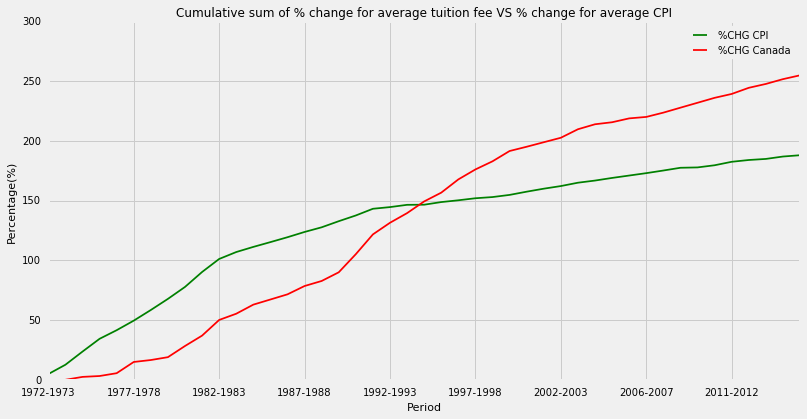

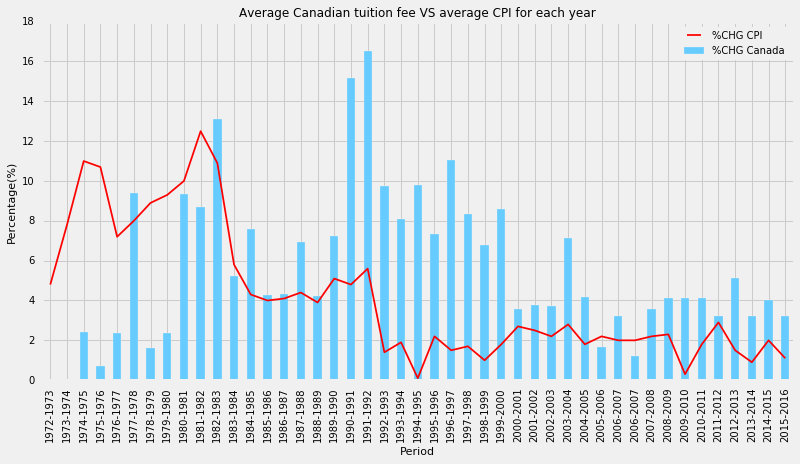

In [26]:

##--## Use the code below instead if you wanna see the %CHG of tuition for ALL provinces vs %CHG CPI 

#df[[12,14,15,16,17,18,19,20,21,22,23]].cumsum().plot(figsize=(12,6),color=['#ffff00',
#'#6666ff','orange','g','darksalmon', 'turquoise','k','#0033cc','deeppink','brown','r','#00ff00']
#,title = 'Average tuition Fees VS average CPI');

##--##

##Plots %CHG CPI and %CHG Canada
df[[12,14]].cumsum().plot(figsize=(12,6),
        title = 'Cumulative sum of % change for average tuition fee VS % change for average CPI',color=['g','r']);
plt.ylabel('Percentage(%)')

##Plots the Average Canadian Tuition fee VS average CPI for each year.
fig, ax = plt.subplots()
df[[12]].plot(ax=ax,color='r',title='Average Canadian tuition fee VS average CPI for each year')
df[[14]].plot.bar(ax=ax,figsize=(12,6),color='#66ccff')
plt.ylabel('Percentage(%)')
plt.style.use('seaborn-pastel')

In the first graph, we can see that from the 70s right up until the late 80s / early 90s, rate of increase for average tuition across Canada has seem to be increasing exponentially whereas the CPI was increasing at a slower rate with what it seems to be a logarithmic growth. After both lines intersect, we see that the gap between the two lines are diverging and what does this mean? We can also see that the net increase for %change in tuition fee is definitely higher than the %change in CPI and the divergence we see simply means that average university tuition fee in Canada is increasing faster than the average inflation rate 

In [27]:
#We can see the net change in university tuition fee in % is far higher than the net change in CPI.
print(df[[12,14]].sum())

%CHG CPI       187.900000
%CHG Canada    254.761218
dtype: float64


On the 2nd graph, focus on the pattern of the red line compared to the maximum of each bars. We see there is a quite a strong correlation between the change in CPI to the change in average university tuition fee and the correlation between them is: 93.8%

In [28]:
#Correlation between average CPI and average Canadian tuition fee
df['Average CPI'].corr(df['Canada'])

0.93759848496217391

### Computing the inflation rate of CPI from 1972-2015

Now, let's see the inflation rate from 1972 - 2015 and compare it to the raw chage of tuition fee in Canada

$$\text{Inflation rate}=\frac{\text{CPI of current year}}{\text{CPI of base year}}$$

In [29]:
#Retrieving the CPI in 1972
cpi_1972 = ind_Year['Average CPI'].loc[1972]
cpi_1972

21.899999999999999

In [30]:
#Retrieving the CPI in 2015
cpi_2015 = ind_Year['Average CPI'].loc[2015]
cpi_2015

126.59999999999999

#### Inflation rate

In [31]:
#Calculating inflation rate
actual_inflation_rate = (cpi_2015-cpi_1972)/cpi_1972*100
actual_inflation_rate

478.08219178082192

In 1972, the CPI was 21.9 and in 2015 it was 126.6. That's a **478%** inflation!

Average Annual Rate of Inflation (%) / Decline in the Value of Money:


$$[\frac{\text{CPI in 2015}}{\text{CPI in 1972}}^{\large(\frac{1}{\text{# of years from 1st year}})}-1] \times 100$$

In [32]:
((cpi_2015/cpi_1972)**(1/43) - 1) * 100

4.1647289630727835

We see that the actual annual rate of inflation is 4.16% which is equivalent to saying that the average CPI increase each year is ~4.16%

### Computing the inflation rate of tuition fee from 1972-2015

In [33]:
#v=df['Canada'].ix[0:1].sum()
tuition_1972=df.set_index('Year')['Canada'].loc[1972]
tuition_1972

534.0

In [34]:
#b=df['Canada'].ix[44:45].sum()
tuition_2015=df.set_index('Year')['Canada'].loc[2015]
tuition_2015

6191.0

#### Inflation rate for average Canadian tuition fee from 1972-2015

In [35]:
inflation_Tuition=(tuition_2015-tuition_1972)/tuition_1972*100
inflation_Tuition

1059.3632958801497

Since 1972, tuition fee in Canada has inflated by **1,059%** as shown above!!**

In [36]:
((tuition_2015/tuition_1972)**(1/43) - 1) * 100

5.8642418842640209

The actual annual rate of inflation for tuition is 5.86%. This means on average each year, tuition for undergraduates is rising $5.86/4.16 = $**1.4x** faster than inflation rate!

In [37]:
tuition_1990=ind_Year['Canada'].loc[1990]
inflation_Tuition9015=((tuition_2015/tuition_1990)**(1/25)-1)*100

cpi_1990 = ind_Year['Average CPI'].loc[1990]
inflation_rate9015= ((cpi_2015/cpi_1990)**(1/25)-1)*100

inflation_Tuition9015/inflation_rate9015

3.0678451495690271

With the calculation above, since the year 1990 average tuition for undergrads has risen **3x** faster than inflation rate!!

### How much more has tuition inflated compared to the actual inflation rate?

$$\frac{\text{Tuition inflation rate}}{\text{ CPI inflation rate}}$$

In [38]:
inflation_Tuition/actual_inflation_rate

2.2158601890902845

Tuition has increased 2.2x more than actual inflation rate for Canada spanning the period 1972-2015 shown in the calculation above

### How much did Canadian undergraduates pay (in today's [2015] dollar) for university back in 1972??

The formula for it will be 

$$\text{Price in 1972}\times\frac{\text{CPI in 2015}}{\text{CPI in 1972}} = \text{the worth of the dollar compared to today's prices or the adjusted price with inflation}$$

In [39]:
adj_tuition = tuition_1972*(cpi_2015/cpi_1972)
adj_tuition

3086.9589041095892

This means in today's dollar, Canadians that went to university in 1972 would only pay on average **~\$3,087** per annum for university tuition fee

To calculate how many more times we are paying for tuition,
$$\frac{\text{tuition fee in 2015}}{\text{adjusted tuition fee from 1972}}$$

and the calculation below tells us that we're paying **2x** times more than what we should be paying!!

In [40]:
tuition_2015/adj_tuition

2.0055336634893588

## Conclusion:

From this, we can conclude that we are definitely paying a much steeper price for post-secondary education. In fact, we're paying **twice** as much as we would have paid compared to tuition fees in 1972. But the question remains why are we paying twice as much? These may be some of the reasons but we must explore further to know:

* Increased competition to get into university
* Better facilities on campuses
* With more students enrolled to accomodate increasing demand for post-secondary education, number of university staffs employed increases too

Also, check out this [app](http://apps.policyalternatives.ca/) to explore tuition for full time undergraduates programs across Canada.

### A little FUN FACT

Let's look at this from another perspective. In 1972, the average [minimum wage](http://srv116.services.gc.ca/dimt-wid/sm-mw/rpt2.aspx) in Canada was \$1.53 and in 2015 it is \$10.21

#### Inflation rate for minimum wages from 1972 - 2015

$$\text{Inflation rate of Minimum wage} = \frac{\text{average minimum wage in Canada for 2015 - average minimum wage in Canada for 1972}}{\text{average minimum wage in Canada for 1972}} * 100$$

In [41]:
inflation_minWage = (10.21-1.525)/1.525*100
inflation_minWage

569.5081967213115

In [42]:
actual_inflation_rate/inflation_minWage

0.83946498844646333

In other words, for every dollar increase in the minimum wage since 1972, the price of an average item has gone up \$0.84 That's actually quite surprising!

So, let’s say you’re earning minimum wage and trying to make it through university.

In 1972, you could work $\frac{534}{1.525} = 350$ hours at a minimum wage job over the course of a year to earn enough to pay for a year of schooling at university.

In 2016, you must work $\frac{6191}{10.21} = 606$ hours at a minimum wage job to pay for tuition! 

From the calculation above, this cannot be due to the decrease in the dollar value, hence, the only possible explanation is that tuition costs has risen much faster than the average CPI which we have shown above.

Sources: 

[ABACUS Licensed Data Collection Dataverse](https://login.ezproxy.library.ubc.ca/login?url=http://dvn.library.ubc.ca/dvn/dv/ABACUSLD)

StatsCanada:
[CPI](http://www.statcan.gc.ca/tables-tableaux/sum-som/l01/cst01/econ46a-eng.htm), [Minimum Wage](http://srv116.services.gc.ca/dimt-wid/sm-mw/rpt1.aspx)